#Hacer un Dashboard con los casos nuevos diarios de COVID19 por paises, de acuerdo a la idea de que existe un patrón estacional. 

El dashboard debe incluir al menos 1 de cada uno de los gráficos vistos en este sub-módulo (hist, hist2D/hexbin, joyplot, scatterplot/lmplot).

Utilice como guía: https://matplotlib.org/3.2.1/tutorials/intermediate/gridspec.html

Dashboard:
Un "Dashboard" o tablero, es un tipo de interfaz gráfica que es utilizado para proporcionar una vista rápida de diversos indicadores (por ejemplo, en un negocio estos se llama indicadores clave de rendimiento -KPI-) relevantes para un objetivo particular.

#Equipo Ali, Alexa 

In [ ]:
pip install pycountry

     |████████████████████████████████| 10.1MB 8.6MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=9ff43b9e10387dceccab204ed2b9d461456c278fe1ff38f5b357805fb82ec788
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [ ]:
#Importamos librerias
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import numpy as np
import pandas as pd
import pycountry
import plotly.express as px
#plt.style.use('classic')
#plt.style.use('ggplot')
#plt.style.use('fast')
plt.style.use('dark_background')



In [ ]:
#Obtener datos
#Html paths for csv files from John Hopkins - Confirmed / Death cases
confirmedPath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deathsPath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

df_Confirmed = pd.read_csv(confirmedPath, header=0, index_col=0, parse_dates=True, squeeze=True)
df_Confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_Confirmed = df_Confirmed.drop(["Lat","Long"],axis="columns")


df_Confirmed = df_Confirmed.set_index('Country')
df_Confirmed = df_Confirmed.stack()
df_Confirmed.index = df_Confirmed.index.rename('Date', level=1)
df_Confirmed.name = 'Confirmed'
df_Confirmed = df_Confirmed.reset_index()


df_Deaths = pd.read_csv(deathsPath, header=0, index_col=0, parse_dates=True, squeeze=True)
df_Deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
df_Deaths = df_Deaths.drop(["Lat","Long"],axis="columns")

df_Deaths = df_Deaths.set_index('Country')
df_Deaths = df_Deaths.stack()
df_Deaths.index = df_Deaths.index.rename('Date', level=1)
df_Deaths.name = 'Deaths'
df_Deaths = df_Deaths.reset_index() 

#df_Confirmed.head()
#df_Deaths.head()


In [ ]:
#Concatenamos muertes y confirmados
data = pd.concat([df_Confirmed, df_Deaths], axis=1, sort=False)
data = data.loc[:,~data.columns.duplicated()]
data.head()

,Country,Date,Confirmed,Deaths
0,Afghanistan,1/22/20,0,0
1,Afghanistan,1/23/20,0,0
2,Afghanistan,1/24/20,0,0
3,Afghanistan,1/25/20,0,0
4,Afghanistan,1/26/20,0,0


In [ ]:
#Lista de paises
list_countries = data['Country'].unique().tolist()
list_countries

In [ ]:
#numero total de paises
len(list_countries)

192

In [ ]:
#Hacer una lista de codigo por pais / tener en cuenta que hay paises que no se les puede obtener code
list_countries = data['Country'].unique().tolist()
d_country_code = {}  # To hold the country names and their ISO
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({country: ' '})

could not add ISO 3 code for -> Burma
could not add ISO 3 code for -> Congo (Brazzaville)
could not add ISO 3 code for -> Congo (Kinshasa)
could not add ISO 3 code for -> Diamond Princess
could not add ISO 3 code for -> Korea, South
could not add ISO 3 code for -> Laos
could not add ISO 3 code for -> MS Zaandam
could not add ISO 3 code for -> Taiwan*
could not add ISO 3 code for -> West Bank and Gaza


In [ ]:
#Ignorar esta parte ya que aun que le coloque manual el codigo no los va a jalar el mapa
d_country_code['Korea, South'] = 'KSO'
d_country_code['Burma'] = 'BMA'
d_country_code['Congo (Brazzaville)'] = 'CBR'
d_country_code['Congo (Kinshasa)'] = 'CKS'
d_country_code['Diamond Princess'] = 'DPR'
d_country_code['Laos'] = 'LOS'
d_country_code['MS Zaandam'] = 'MSZ'
d_country_code['Taiwan*'] = 'TWN'
d_country_code['West Bank and Gaza'] = 'WBG'
#d_country_code

In [ ]:
#Agregamos al pais su codigo (Nueva columna) y llenamos
for k, v in d_country_code.items():
    data.loc[(data.Country == k), 'iso_alpha'] = v
    #print(data)
data.head()

In [ ]:
#Cambiamos formato de fecha
data2 = data.copy()
data2['Date'] = pd.to_datetime(data2['Date']).dt.date.astype(str)
data2

In [ ]:
#Esto para verificar por que autralia se duplica
prueba= data2[data2['Country']== 'Australia']
prueba.tail(75)

#Pedir fecha 
Se considera interesante pensar en apartir de una fecha saber como andaban los casos en ese entonces.

In [ ]:
import datetime

today = datetime.date.today()
print(today)

2021-04-29


In [ ]:
#Pedimos fecha
print("Que fecha quieres consultar, Formato XXXX-XX-XX Año, mes, dia")
fecha = input()

Que fecha quieres consultar, Formato XXXX-XX-XX Año, mes, dia
2021-04-27


In [ ]:
#Hacemos un subset de la fecha que se quiere
data_fecha = data2[data2['Date']== fecha]
data_fecha.head(40)
#len(data_fecha)

In [ ]:
#Hacemos datos solo de muertes ordenados

data_muertes = data_fecha.drop(['Date', 'Confirmed', 'iso_alpha'], axis=1)
data_muertes = data_muertes.sort_values('Deaths')
data_muertes.head(40)

In [ ]:
data_muertes.head()

In [ ]:
#Hacemos datos solo contagiados ordenados

data_confirmados = data_fecha.drop(['Date', 'Deaths', 'iso_alpha'], axis=1)
data_confirmados = data_confirmados.sort_values('Confirmed')
data_confirmados.tail(40)

In [ ]:
muertes = data_muertes.iloc[-10:] # Primeras cinco filas - para obtener el top de muertes

In [ ]:
confirmados = data_confirmados.iloc[-10:] # Primeras cinco filas - para obtener el top de confirmados

In [ ]:
#MAPA - Comentario (Lo deje afuera por q no pude colocarlo dentro del grid)
mapa = px.choropleth(data_fecha, locations = data_fecha['iso_alpha'], color="Confirmed", hover_name= data_fecha['Country'])
mapa.show()
                   

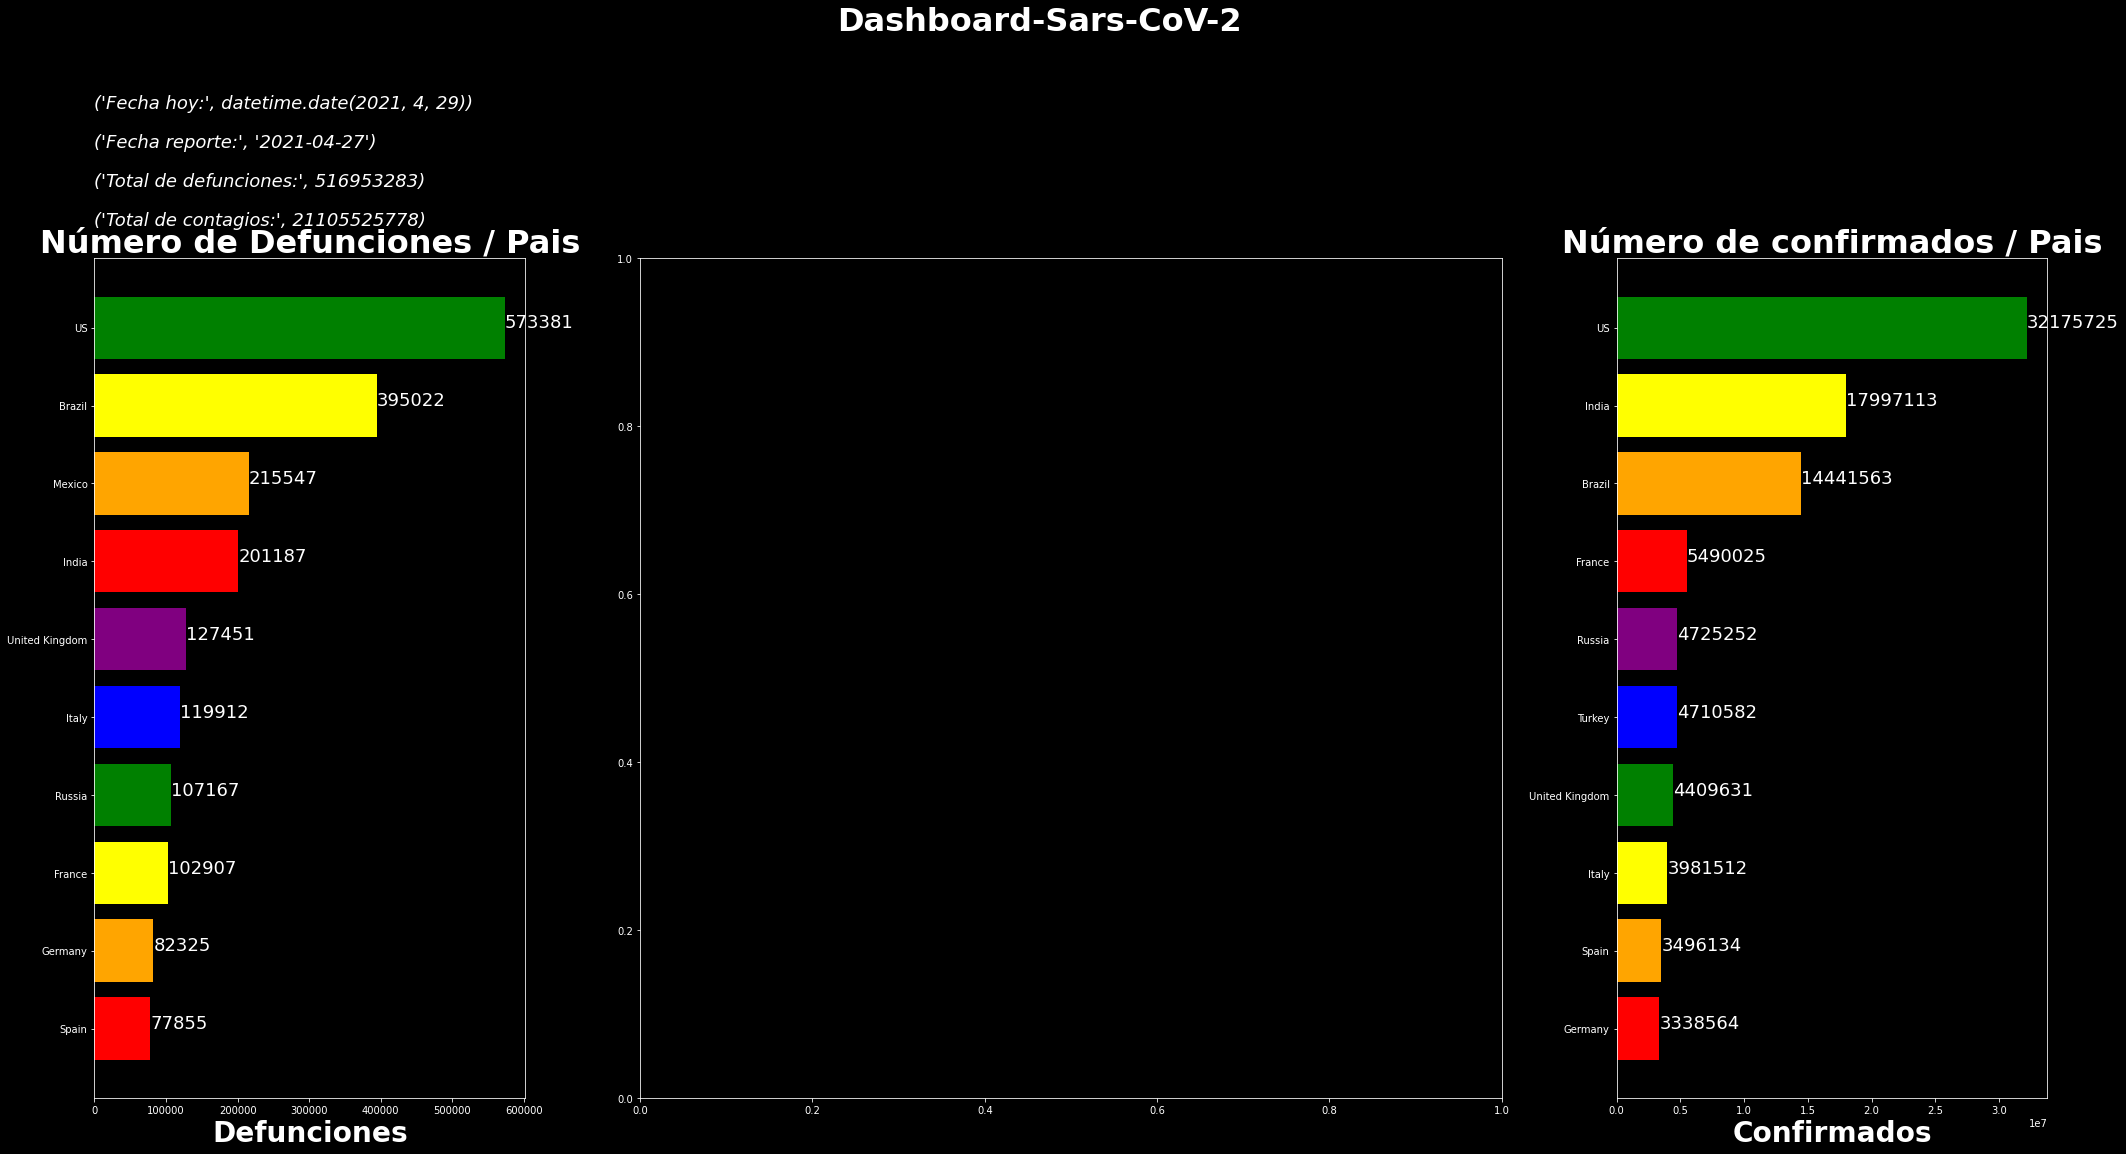

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
#El GRID
gs = plt.figure(constrained_layout=False, figsize=(35,35))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 2,1], height_ratios=[8, 4, 4])

fecha_datos="Fecha hoy:", today
fecha_datos_v= "Fecha reporte:", fecha
total_defunciones= "Total de defunciones:", data['Deaths'].sum()            
total_contagios= "Total de contagios:", data['Confirmed'].sum() #LA suma de los contagios esta extraña, no es confiable

#--------------------------------------------------------------------------
ax1 = plt.subplot(gs[0])
ax1.barh(muertes['Country'],muertes['Deaths'], color=[ 'red', 'red', 'red', 'red','red', 'red', 'red', 'red', 'red', 'red']) 
for index, value in enumerate(muertes['Deaths']):
    plt.text(value, index, str(value), fontsize=18)
ax1.set_xlabel("Defunciones", fontsize=28, fontweight='bold')
ax1.set_title('Número de Defunciones / Pais', fontsize=32, fontweight='bold')

plt.text(4, 12, fecha_datos, fontsize=18, style='oblique', va='top', wrap=True)
plt.text(4, 11.5, fecha_datos_v, fontsize=18, style='oblique',va='top', wrap=True)
plt.text(4, 11, total_defunciones, fontsize=18, style='oblique', va='top', wrap=True)
plt.text(4, 10.5, total_contagios, fontsize=18, style='oblique', va='top', wrap=True) #LA suma de los contagios esta extraña, no es confiable


#--------------------------------------------------------------------------
#Aqui meter el mapa

ax2 = plt.subplot(gs[1])
ax2.set_title('Mapa/Defunciones', fontsize=32, fontweight='bold')
#ax2 = px.choropleth(data_fecha, locations = data_fecha['iso_alpha'], color="Deaths", hover_name= data_fecha['Country'])

#--------------------------------------------------------------------------



ax3 = plt.subplot(gs[2])
ax3.barh(confirmados['Country'], confirmados['Confirmed'], color=[ 'orange', 'orange', 'orange', 'orange','orange', 'orange', 'orange', 'orange', 'orange', 'orange'])
for index, value in enumerate(confirmados['Confirmed']):
    plt.text(value, index, str(value), fontsize=18)
ax3.set_xlabel("Confirmados", fontsize=28, fontweight='bold')
ax3.set_title('Número de confirmados / Pais', fontsize=32, fontweight='bold')

#--------------------------------------------------------------------------

plt.suptitle("Dashboard-Sars-CoV-2", fontsize=32, fontweight='bold' )

plt.show()


In [ ]:
#Intente hacerlo de esta forma para poder meter al grid el mapa pero tampoco me dejo jeje
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

#fig = px.choropleth(data_fecha, locations = data_fecha['iso_alpha'], color="Confirmed", hover_name= data_fecha['Country'])
fig = make_subplots(rows=1, cols=3, shared_yaxes=False, column_widths=[0.3, 0.8, 0.3])

#-----------------------------------------
fig.add_trace(go.Bar(x=(muertes['Country']), y=(muertes['Deaths']),marker=dict(color=[10,9,8,7,6,5,4,3,2,1], coloraxis="coloraxis")),1, 1)


#fig.add_trace(go.Bar(x=[1, 2, 3], y=[4, 5, 6], marker=dict(color=[4, 5, 6], coloraxis="coloraxis")),1, 2)
#fig.add_choroplethmapbox(locations = data_fecha['iso_alpha'], row=None, col=None)
#fig.add_choropleth(locations = data_fecha['iso_alpha'], row=None, col=None)
#map = px.choropleth(data_fecha, locations = data_fecha['iso_alpha'], color="Confirmed", hover_name= data_fecha['Country'])
#fig.add_trace(px.choropleth(data_fecha, locations = data_fecha['iso_alpha'], color="Confirmed", hover_name= data_fecha['Country']),1,2)
#fig.add_trace(go.Figure( data=go.Choropleth( locations=data_fecha['iso_alpha'], z = data_fecha['Country'] )) )
fig.add_trace(go.Figure( data=px.choropleth(data_fecha, locations = data_fecha['iso_alpha'], color="Confirmed", hover_name= data_fecha['Country'] )) )





fig.add_trace(go.Bar(x=(confirmados['Country']), y=(confirmados['Confirmed']),marker=dict(color=[10,9,8,7,6,5,4,3,2,1], coloraxis="coloraxis")),1, 3)
#-----------------------------------------




#fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.update_layout(height=700, showlegend=False)
#map.show()
fig.show()

In [ ]:
#Intente hacerlo de esta forma para poder meter al grid el mapa pero tampoco me dejo jeje
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

trace11 = go.Bar(x=(muertes['Country']), y=(muertes['Deaths']),marker=dict(color=[10,9,8,7,6,5,4,3,2,1], coloraxis="coloraxis"))
trace12 = px.choropleth(data_fecha, locations = data_fecha['iso_alpha'], color="Confirmed", hover_name= data_fecha['Country'])
trace13 = go.Bar(x=(muertes['Country']), y=(muertes['Deaths']),marker=dict(color=[10,9,8,7,6,5,4,3,2,1], coloraxis="coloraxis"))



from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=3,  shared_yaxes=False)

fig.append_trace(trace11, row=1, col=1)
fig.add_traces(trace12, rows=1, cols=2)
fig.append_trace(trace13, row=1, col=3)

fig.show()